In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
details = pd.read_csv('/content/twitter_training.csv')
details1 = pd.read_csv('/content/twitter_validation.csv')

In [ ]:
details.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
details1.head(5)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
details.columns = ['ID', 'GAME', 'SENTIMENT', 'TEXT']
details1.columns = ['ID', 'GAME', 'SENTIMENT', 'TEXT']

In [ ]:
details

,ID,GAME,SENTIMENT,TEXT
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
details1

,ID,GAME,SENTIMENT,TEXT
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
details.shape

(74681, 4)

In [ ]:
details1.shape

(999, 4)

In [ ]:
details.describe(include='all')

,ID,GAME,SENTIMENT,TEXT
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [ ]:
GAME_types = details['GAME'].value_counts()
GAME_types

,count
GAME,
TomClancysRainbowSix,2400
MaddenNFL,2400
Microsoft,2400
LeagueOfLegends,2394
CallOfDuty,2394
Verizon,2382
CallOfDutyBlackopsColdWar,2376
ApexLegends,2376
Facebook,2370


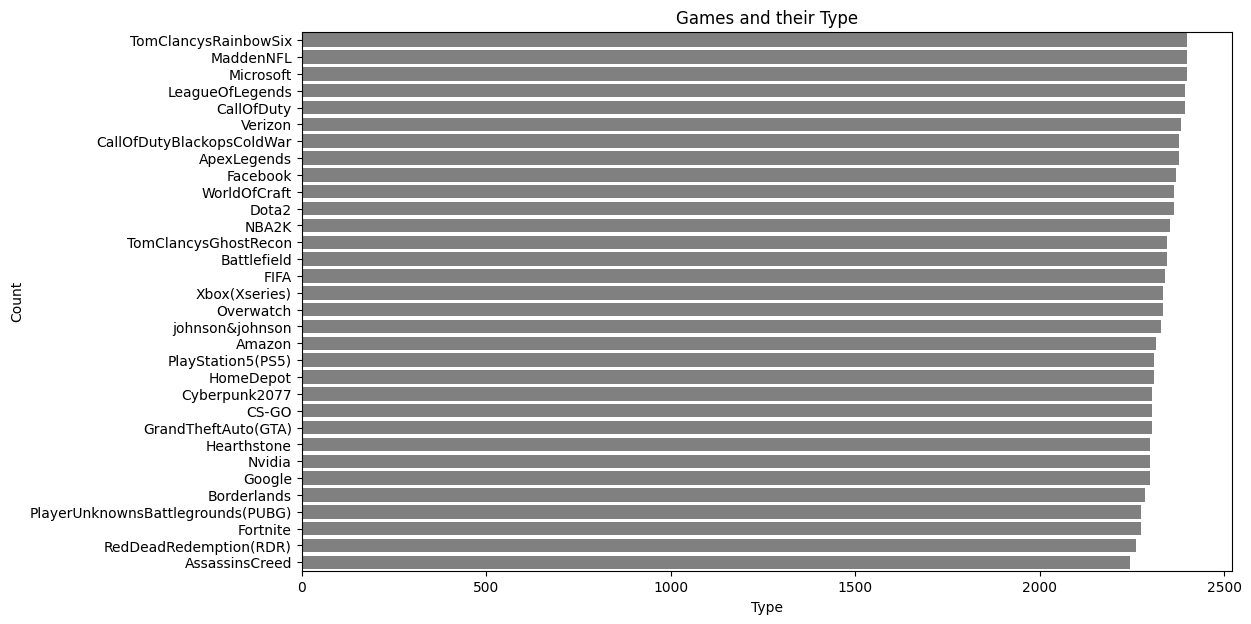

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(y=GAME_types.index, x=GAME_types.values, color="grey")
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Games and their Type')
plt.show()

In [ ]:
SENTIMENT_counts=details['SENTIMENT'].value_counts()
SENTIMENT_counts

,count
SENTIMENT,
Negative,22542
Positive,20831
Neutral,18318
Irrelevant,12990


<Axes: >

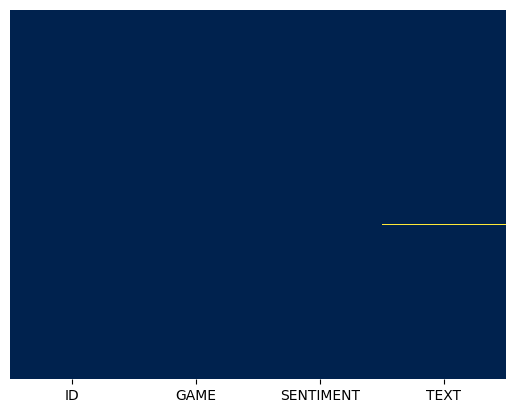

In [ ]:
sns.heatmap(details.isnull(),yticklabels=False,cbar=False,cmap='cividis')

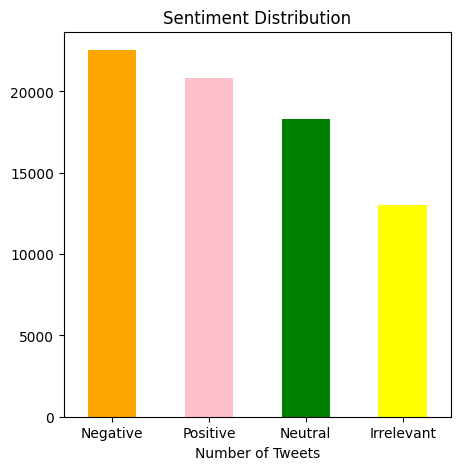

In [41]:
plt.figure(figsize=(5,5))
SENTIMENT_counts.plot(kind='bar',color=['orange','pink','green','yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [47]:
SENTIMENT_types = details['SENTIMENT'].value_counts()
SENTIMENT_types

,count
SENTIMENT,
Negative,22542
Positive,20831
Neutral,18318
Irrelevant,12990


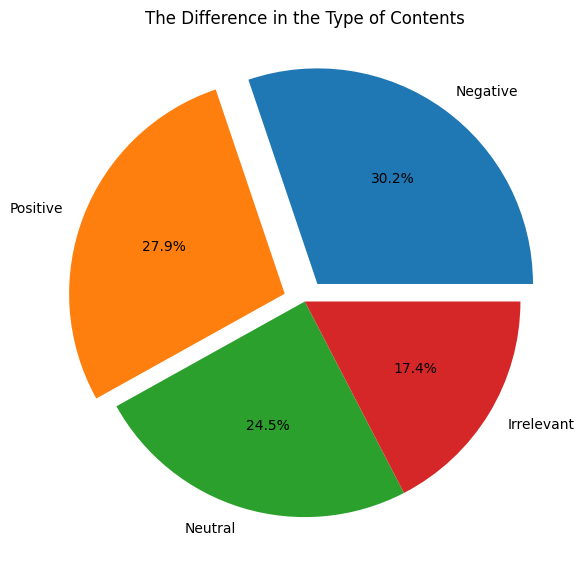

In [48]:
plt.figure(figsize=(12,7))
plt.pie(x=SENTIMENT_types.values, labels=SENTIMENT_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

In [66]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [67]:
details['SENTIMENT']=label_encoder.fit_transform(details['SENTIMENT'])
details['GAME']=label_encoder.fit_transform(details['GAME'])
details1['SEMTIMENT']=label_encoder.fit_transform(details1['SENTIMENT'])
details1['GAME']=label_encoder.fit_transform(details1['GAME'])

In [68]:
details.nunique()

,0
ID,12447
GAME,32
SENTIMENT,4
TEXT,69490


In [69]:
details1.nunique()

,0
ID,999
GAME,32
SENTIMENT,4
TEXT,998
SEMTIMENT,4
